In [374]:
# from __future__ import division # uncomment this if using Python 2.7
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
%matplotlib inline

#### implementing the unit step, rect and sinc 
We need, first of all, to implement a unit step. Then, use the u(t) definition to redefine the rectangular function.

Your $u(t)$ should look like the following image.
<img src="ut.png" width=500 height=300></img>
<b>NB#1</b> In order to be actually useful, this function should work also for $t<0$. 
<br>
<b>NB#2</b> Taking advantage of this new function, you can now redefine the rectangular window in a more complete and elegant way. Can you guess how?


Finally, let's define a sinc function such that:

$$\frac{\sin(Wt)}{\pi t} \Leftrightarrow X(\omega) = rect_W(\omega)$$

We consider 1000 samples


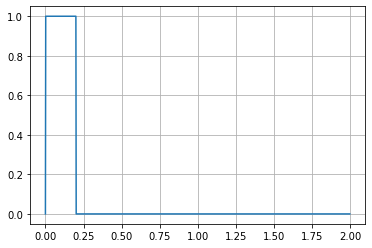

In [375]:
def u(t, T0):
    """ u(t-T0) """
    return np.array([1 if x > T0 else 0 for x in t])

def rect(t, T0, T):
    """ rect((t-T0)/T) """
    return u(t, T0-T) - u(t-T, T0) 

def sinc(t, T0, W,epsilon=10e-10):
    """ sinc(b(t-T0)) - its FT has bandwidth 2W in omega space"""
    return np.sinc(W * (t-T0))



## sampling rate in Hz 
f_s = 500

## acquisition time
t_max = 2

## sampling 2s at f_s frequency
time = np.arange(0, t_max, 1/f_s)# --- complete here --- # 



## number of samples
print("We consider %d samples"%time.size)

T0x = 0.1
T0y = 0.3
T = 0.1
# plt.plot(t, u(t, 3), label="u")
plt.plot(time, rect(time, T0x, T),label="rect")
# plt.plot(t, sinc(t, 4, 3), label="sinc")
# plt.legend()
plt.grid()



# Signal filtering

In the previous labs, we introduced the concept of signal analysis in the frequency domain. 

In order to do that we gave the definition of <i>Fourier (inverse) transform</i> and <i>Fourier series</i> decomposition. 

An important question may now arise: <b>why do we care about that?</b> 

The main goal of this lab is to show some of the most important applications of the Fourier theory in signal processing.
In order to do that, let's briefly talk about a new operation.

## Convolution

<a href="https://en.wikipedia.org/wiki/Convolution">Convolution</a> is a fundamental tool for signal processing. Given two generic signals $f(t)$ and $g(t)$, the signal $z(t)$ obtained by their convolution can be defined as follows.
$$
    c(t) = (f*g)(t) = f(t)~*~g(t) = \int_{-\infty}^\infty f(t)g(t-\tau)d\tau
$$
Intuitively, $c(t)$ can be seen as the area of overlap of the two functions while one is fixed and the other is moving on the horizontal (time) axis. The animation below shows that convolving two rect signals we end up with a triang.
<img src="convolution.gif" width=500 height=300></img>
The <font face="TrueType">numpy</font> function that implements one-dimensional signal convolution is <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html"><font face="TrueType">numpy.convolve</font></a>. Check its documentation and try to convolve some signals.

[Hint: set the argument <font face="TrueType">mode='same'</font> in order to have a $c(t)$ of the same length of $x(t)$ and $y(t)$]

We consider 800 samples


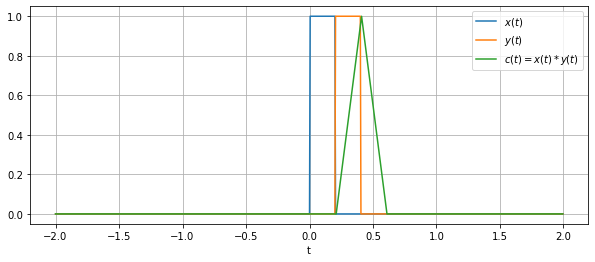

In [376]:
# E.g.: x(t) = rect((t-T0x)/T) with T0x = 0.1
#       y(t) = rect((t-T0y)/T) with T0y = 0.3
#       c(t) = x(t) * y(t)

## sampling rate in Hz 
f_s = 200

## acquisition time
t_max = 2

## sampling 2s at f_s frequency
time = np.arange(-t_max, t_max, 1/f_s)# --- complete here --- # 

## number of samples
print("We consider %d samples"%time.size)

T0x = 0.1
T0y = 0.3

T = 0.1

x = rect(time, T0x,T)  # this was called f(t) in the example above
y = rect(time, T0y,T)  # this was called g(t) in the example above

c = np.convolve(x, y, mode='same') / np.sum(x) # it's the same as len(np.argwhere(x!=0))

plt.figure(figsize=(10, 4))
plt.plot(time, x, label=r'$x(t)$')
plt.plot(time, y, label=r'$y(t)$')
plt.plot(time, c, label=r'$c(t) = x(t) * y(t)$')
#plt.ylim(0,1.2)
plt.xlabel('t')
plt.legend()
plt.grid()

Signals convolution is extremely important also for its consequences in the frequency domain. In fact, it can be proven that, given two signals $x(t)$ and y(t) and their Fourier transform $X(f)$, $Y(f)$ we have:
$$
  x(t)~*~y(t) \Leftrightarrow X(f)\cdot Y(f)
$$
so, a convolution in the time domain corresponds to a product in the frequency domain. Thanks to the <i>duality</i> property of the Fourier transform, the viceversa holds as well:
$$
    X(f)~*~Y(f) \Leftrightarrow x(t)\cdot y(t)
$$
a **convolution in the frequency domain corresponds to a product in the time domain**. 

This observation is known as the <a href="https://en.wikipedia.org/wiki/Convolution_theorem">Convolution theorem</a> and it can be seen as a new property of the Fourier transform. Given that a signal cannot be, simultaneously, time and band limited, this property is often very helpful.

The function <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html"><font face="TrueType">np.convolve()</font></a> is not the only one offered in the scipy stack. 

In fact, the same result can be obtained by using <a href="http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.fftconvolve.html"> <font face="TrueType">scipy.signal.fftconvolve()</font></a>. This second implementation takes advantage of the convolution theorem and it could be faster for certain circumstances. 
**From now on, feel free to use your favourite one**.

### Exercise
Taking advantage of what you've just learned, compute and plot $c(t) = x(t)~*~y(t)$ where:

$x(t) = \frac{\sin(W t)}{\pi t}$
$y(t) = \text{cos}(2\pi f_0 t) + \text{cos}(2\pi f_1 t)$


Set $f_0 = 20$ and $f_1 = 70$. Predict and check empirically what happens when you convolve the obtained signal $y(t)$ with $x(t)$ with $W = 10$, $50$, and $80$. When you've done, verify the Convolution Theorem by computing $C(\omega)=X(\omega)Y(\omega)$ and back to the time domain to $c(t)$ through the IFFT.

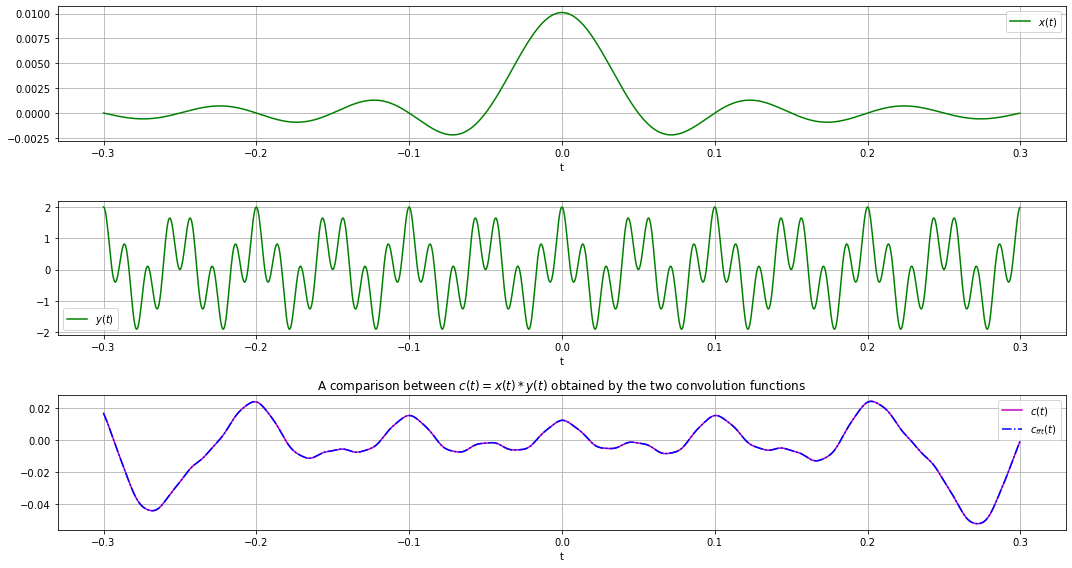

In [386]:
## sampling rate in Hz 
f_s = 2048

## acquisition time
t_max = 0.3 #time in s

## sampling at f_s frequency
time = np.arange(-t_max, t_max,1/f_s) 


## sinc
W= 20
x = sinc(time,0,W)
x = x/ np.sum(x)

## 
f0 = 20
f1 = 70

## input signal
slow = np.cos(2*np.pi*f0*time)  # f=20Hz
fast = np.cos(2*np.pi*f1*time) # f=60Hz
y = slow+fast

## c(t)=x(t)*y(t)
c = np.convolve(x, y, mode='same')    ## convolution with numpy
c2 = signal.fftconvolve(x, y, mode='same') ## convolution with signal 

plt.figure(figsize=(15, 8))
plt.subplot(3,1,1)
plt.plot(time, x, '-g', label=r"$x(t)$")
plt.xlabel('t')
plt.legend()
plt.grid()

plt.subplot(3,1,2)
plt.plot(time, y, '-g', label=r"$y(t)$")
plt.xlabel('t')
plt.legend()
plt.grid()

plt.subplot(3,1,3)
plt.title(r'A comparison between $c(t) = x(t) * y(t)$ obtained by the two convolution functions')
plt.plot(time, c, '-m',label=r"$c(t)$")
plt.plot(time, c2, '-.b',label=r"$c_{fft}(t)$")
#plt.plot(time, slow, '--k',label=r"$c_{th}(t)$")
#plt.plot(time, fast, '--k',label=r"$c_{th}(t)$")
plt.xlabel('t')
plt.legend()
plt.tight_layout()
plt.grid()

In [378]:
np.sum(x)

1.0

1229


C:\Users\andres.coronado\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


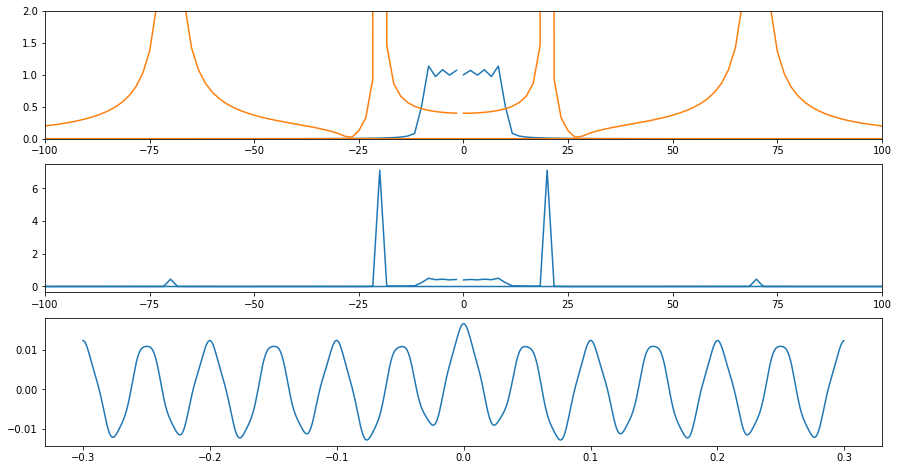

In [379]:
## let's try it in the fourier domain. We compute the product in the frequency domain

N=len(time)
print(N)

X = np.fft.fft(x)
freq = np.fft.fftfreq(N,1/f_s)
Y= np.fft.fft(y)

plt.figure(figsize=(15, 8))
## X and Y
plt.subplot(3,1,1)
plt.plot(freq,np.abs(X))
plt.plot(freq,np.abs(Y))
plt.xlim([-100,100])
plt.ylim([0,2])

## C = X*Y
C = X * Y 
plt.subplot(3,1,2)
plt.plot(freq,np.abs(C))
plt.xlim([-100,100])

## back to time domain with the inverse Fourier transform
c_rev = np.fft.ifft(C)
plt.subplot(3,1,3)
plt.plot(time,c_rev)


#### Implementing an LTI

We will now create a new Python class that implements an <font style="TrueType">LTI</font> system. 

This object will have a name, an impulse function and a transform method that allows us to pass from $x(t)$ to $y(t)$. 

Feel free to add any other attribute or method you like (e.g. maybe a "private" method that passes from $h(t)$ to $H(f)$?). 

In [387]:
%%writefile --append DSIP_utils.py
# uncomment the line above when you're ready

class LTI:
    """ Linear time-invariant system object """    
    def __init__(self, name, imp_resp):
        self.name = name
        self.h = imp_resp
        self.H = self._setFrequencyResponse()
        
    def transform(self, x):
        return signal.fftconvolve(x, self.h, mode='same') #/ np.sum(np.abs(x))
    
    def _setFrequencyResponse(self):
        return np.fft.fft(self.h)/np.sum(np.abs(self.h))

Writing DSIP_utils.py


## Ideal filters
According to their behaviour in the frequency domain, we can distinguish between different ideal filters.

<table border="1", style="width:75%">
<tr>
<th width="140">Name</th>
<th>Frequency response $H(f)$</th>
</tr>

<tr>
<td><b><a href="https://en.wikipedia.org/wiki/Low-pass_filter">Low-pass (LP)</a></b></td>
<td><img src="LP.png" width=400 height=200></img></td>
</tr>

<tr>
<td><b><a href="https://en.wikipedia.org/wiki/High-pass_filter">High-pass (HP)</a></b></td>
<td><img src="HP.png" width=400 height=200></img></td>
</tr>

<tr>
<td><b><a href="https://en.wikipedia.org/wiki/Band-pass_filter">Band-pass (BP)</a></b></td>
<td><img src="BP.png" width=400 height=200></img></td>
</tr>

<tr>
<td><b><a href="https://en.wikipedia.org/wiki/Band-stop_filter">Band-stop (BS)</a></b></td>
<td><img src="BS.png" width=400 height=200></img></td>
</tr>

</table>


## LP and BP filters

Write and implement the impulse response $h(t)$ for the ideal LP and BP filters (then add them to your personal module).

When you've done, try to filter the input signal

$$
    x(t) = \text{cos}(2\pi f_0 t)+\text{cos}(2\pi f_1 t)+\text{cos}(2\pi f_2 t)
$$ 

where $f_0=16$, $f_1=32$, $f_2=64$ Hz, with the filters above. 

You may start using $B_{LP}=25$ and $B_{BP}=[25,45]$ Hz and then you can change the filter bands as you like.

<b>NB#1</b> Be careful, pictures above show the **frequency response** $H(f)$, so you need to **move from the frequency to the time domain** (via inverse Fourier transform, with paper and pencil).
<br>
<b>NB#2</b> In this exercise you are required to perform the filtering operation in the **time domain** via **convolution** with $h(t)$.

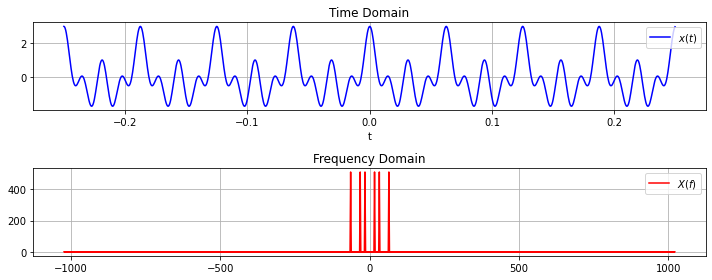

In [388]:
# Input signal x(t)
## sampling rate in Hz 
f_s = 2048

## acquisition time
t_max = 0.25 #time in s

## sampling at f_s frequency
time = np.arange(-t_max, t_max,1/f_s) 

N = len(time)

# fs = 2048
# N  = 1024
# t  = 1/fs * np.arange(-N//2,N//2) 
# f  = fs/N * np.arange(N//2)

f0 = 16 #Hz
f1 = 32 #Hz
f2 = 64 #Hz

x = np.cos(2*np.pi*f0*time)+np.cos(2*np.pi*f1*time)+np.cos(2*np.pi*f2*time)


X = np.fft.fft(x)
freq = np.fft.fftfreq(N,1/f_s)

plt.figure(figsize=(10, 4))
plt.subplot(2,1,1)
plt.plot(time, x,'-b',label=r"$x(t)$")
plt.xlabel('t')
plt.legend()
plt.title('Time Domain')
plt.grid()

plt.subplot(2,1,2)
plt.plot(freq,np.abs(X),'-r',label=r"$X(f)$")
plt.title('Frequency Domain')
plt.legend()
plt.tight_layout()
plt.grid();

In [389]:
# Impulse responses    
def hlp(t,W):
    return sinc(t, 0, W,epsilon=10e-10)/np.sum(sinc(t, 0, W,epsilon=10e-10)) #2*B*np.sinc(2*B*t)

def hbp(t,Bstart,Bstop):
    B = Bstop - Bstart  # (45 -25)*2pi
    omega_shift = Bstart + B/2
    return hlp(t,B)*np.cos(omega_shift*t) ## shift in freq is modulation in time

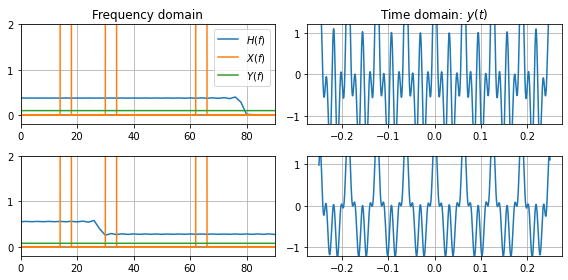

In [390]:
# Filtering operation in the frequency domain
B0 = 25*2*np.pi  # Hz
B1 = 45*2*np.pi # Hz

# Filters defintion
LP = LTI('LP',hlp(time,B0))
BP = LTI('BP',hbp(time,B0,B1))

# Filtering operations
y_lp = LP.transform(x)
y_bp = BP.transform(x)

# -- f -- #
Y_lp = np.fft.fft(y_lp) 
Y_bp = np.fft.fft(y_bp) 

plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
plt.plot(freq,np.abs(LP.H), label=r"$H(f)$")
plt.plot(freq,np.abs(X), label=r"$X(f)$")
plt.plot(freq,np.abs(Y_lp), label=r"$Y(f)$")
plt.title(r"Frequency domain")
plt.ylim(-0.2,2)
plt.xlim(0,90)
plt.legend()
plt.grid('on')

plt.subplot(2,2,3)
plt.plot(freq,np.abs(BP.H), label=r"$H(f)$")
plt.plot(freq,np.abs(X), label=r"$X(f)$")
plt.plot(freq,np.abs(Y_bp), label=r"$Y(f)$")
plt.ylim(-0.2,2)
plt.xlim(0,90)
plt.grid('on')

# -- t -- #

plt.subplot(2,2,2)
plt.plot(time, y_lp)
plt.title(r"Time domain: $y(t)$")
plt.ylim(-1.2,1.2)
plt.grid('on')

plt.subplot(2,2,4)
plt.plot(time, y_bp)
plt.ylim(-1.2,1.2)
plt.grid('on')
plt.tight_layout()

### Filter design

Filter design is actually a sophisticated field, there is not enough time in the remainder of the course to cover it in a more detailed manner. However, now you have the knowledge needed to learn something more interesting by yourself. I'd recommend to google for the keywords in the <i>Filter design</i> section of the <a href="http://docs.scipy.org/doc/scipy/reference/signal.html">scipy signal</a> documentation.